In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
## import dataset
df = pd.read_csv('./data/exoplanets-clean.csv')

null_col_vals = df.isnull().sum().to_dict()
NUM_ROWS = df.shape[0]

thresholdAmount = 0.3 * NUM_ROWS

dropped = []
for key in null_col_vals:
    if(null_col_vals[key] >= thresholdAmount):
        dropped.append(key)

df = df.drop(columns=dropped, axis=1)
df = df.dropna()

df.head()

,num_stars,single_planet_exosystem,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
30,3,True,Imaging,2015,Gemini Observatory,0,11688.000000,6209.250000,-3287.250000,0.0,...,-0.120300,5.21149,0.023,-0.023,4.537,0.024,-0.024,5.15806,0.002308,-0.002308
32,2,False,Radial Velocity,1996,Lick Observatory,0,14.651600,0.000100,-0.000100,0.0,...,-0.012300,5.95084,0.023,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852
35,2,False,Radial Velocity,2004,McDonald Observatory,0,0.736547,0.000001,-0.000001,0.0,...,-0.012300,5.95084,0.023,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852
52,1,False,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),0,8.463080,0.000060,-0.000060,0.0,...,-0.004625,8.81000,0.100,-0.100,4.529,0.020,-0.020,7.84038,0.000731,-0.000731
53,1,False,Transit,2021,Transiting Exoplanet Survey Satellite (TESS),0,18.859690,0.000080,-0.000080,0.0,...,-0.004625,8.81000,0.100,-0.100,4.529,0.020,-0.020,7.84038,0.000731,-0.000731


In [43]:
# Converting Strings to numbers
dictMethod = {}
count = 0
for value in df['discoverymethod']:
    if value not in dictMethod:
        dictMethod[value] = count
        count += 1
df['discoverymethod'] = df['discoverymethod'].map(dictMethod)

dictFac = {}
count2 = 0
for value in df['disc_facility']:
    if value not in dictFac:
        dictFac[value] = count2
        count2 += 1
df['disc_facility'] = df['disc_facility'].map(dictFac)

# df['single_planet_exosystem'] = df['single_planet_exosystem'].map({True: 0, False: 1})

dictBmass = {}
count3 = 0
for value in df['pl_bmassprov']:
    if value not in dictBmass:
        dictBmass[value] = count3
        count3 += 1
df['pl_bmassprov'] = df['pl_bmassprov'].map(dictBmass)

dictMratio = {}
count4 = 0
for value in df['st_metratio']:
    if value not in dictMratio:
        dictMratio[value] = count4
        count4 += 1
df['st_metratio'] = df['st_metratio'].map(dictMratio)

In [44]:
# divide the dataset into class and target variable (target is single_planet_exosystem)
attr = df.drop(columns=['single_planet_exosystem'], axis=1)
target = df['single_planet_exosystem']

print(attr.shape)
print(target.shape)
attr.head()

(3082, 62)
(3082,)


,num_stars,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
30,3,0,2015,0,0,11688.000000,6209.250000,-3287.250000,0.0,13.20000,...,-0.120300,5.21149,0.023,-0.023,4.537,0.024,-0.024,5.15806,0.002308,-0.002308
32,2,1,1996,1,0,14.651600,0.000100,-0.000100,0.0,0.11340,...,-0.012300,5.95084,0.023,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852
35,2,1,2004,2,0,0.736547,0.000001,-0.000001,0.0,0.01544,...,-0.012300,5.95084,0.023,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852
52,1,2,2020,3,0,8.463080,0.000060,-0.000060,0.0,0.06490,...,-0.004625,8.81000,0.100,-0.100,4.529,0.020,-0.020,7.84038,0.000731,-0.000731
53,1,2,2021,3,0,18.859690,0.000080,-0.000080,0.0,0.11080,...,-0.004625,8.81000,0.100,-0.100,4.529,0.020,-0.020,7.84038,0.000731,-0.000731


In [45]:
# Preprocess the dataset and divide into train and test
sc = StandardScaler()
attr = sc.fit_transform(attr)
le = LabelEncoder()
target = le.fit_transform(df['single_planet_exosystem'])
attr_train, attr_test, target_train, target_test = train_test_split(
    attr, target, test_size=0.2, random_state=0)

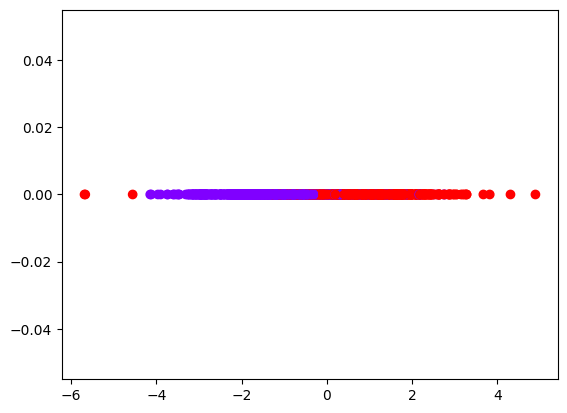

In [50]:
# Apply LDA
lda = LinearDiscriminantAnalysis()
attr_train = lda.fit_transform(attr_train, target_train)
attr_test = lda.transform(attr_test)\

# plot the scatter plot
plt.scatter(attr_train[:, 0], np.zeros_like(attr_train[:, 0]), c=target_train, cmap='rainbow')

In [51]:
# Classification using Random Forest
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(attr_train, target_train)
target_pred = classifier.predict(attr_test)

In [52]:
# print the accuracy
print('Accuracy:', accuracy_score(target_test, target_pred))
print('Confusion Matrix:', confusion_matrix(target_test, target_pred))
plt.show()

Accuracy: 0.8314424635332253
Confusion Matrix: [[216  77]
 [ 27 297]]
